In [61]:
import pandas as pd
import geocoder
import time
import matplotlib as plt
import matplotlib.pyplot as plt
import pprint



In [81]:
df=pd.read_csv('/home/miguel/IronHack/DataSets/GSAF5.csv', encoding='Windows-1252')

In [106]:
#Limpiezas
#Quitamos espacios.
df.Location=df.Location.str.strip()
df.Country=df.Country.str.strip()
#Renombramos nombres de algunas columnas que tienen espacios en blanco.
df.rename(index=str, columns={"Sex ": "Sex", "Species ": "Species"},inplace=True)
df.columns
#


NameError: name 'NaN' is not defined

In [165]:
def empty_column(df):
    empty_results=[]
    for columna in df.columns:
        result=[]
        percentage_empty=(df.shape[0]-df[[columna]].count()[0])/df.shape[0]
        
        result.append(columna)
        result.append(percentage_empty)
        
        empty_results.append(result)
    return empty_results


empty_results=empty_column(df)
empty_results



[['Case Number', 0.0],
 ['Date', 0.0],
 ['Year', 0.0],
 ['Type', 0.0],
 ['Country', 0.007176234979973298],
 ['Area', 0.0670894526034713],
 ['Location', 0.08277703604806408],
 ['Activity', 0.08795060080106809],
 ['Name', 0.03337783711615487],
 ['Sex', 0.09462616822429906],
 ['Age', 0.44742990654205606],
 ['Injury', 0.004506008010680908],
 ['Fatal (Y/N)', 0.003170894526034713],
 ['Time', 0.5362149532710281],
 ['Species', 0.489652870493992],
 ['Investigator or Source', 0.0025033377837116156],
 ['pdf', 0.0],
 ['href formula', 0.00016688918558077436],
 ['href', 0.0005006675567423231],
 ['Case Number.1', 0.0],
 ['Case Number.2', 0.0],
 ['original order', 0.0],
 ['Unnamed: 22', 0.9998331108144193],
 ['Unnamed: 23', 0.9996662216288384]]

In [93]:
paises=(df[['Country','Location']].groupby('Country').count())
paises['Country']=paises.index
paises_mas_25=paises[paises.Location>100]
paises_mas_25

,Location,Country
Country,,
AUSTRALIA,1236,AUSTRALIA
NEW ZEALAND,121,NEW ZEALAND
PAPUA NEW GUINEA,121,PAPUA NEW GUINEA
SOUTH AFRICA,557,SOUTH AFRICA
USA,2074,USA


Index(['AUSTRALIA', 'NEW ZEALAND', 'PAPUA NEW GUINEA', 'SOUTH AFRICA', 'USA'], dtype='object', name='Country')

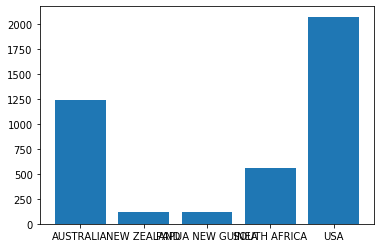

In [94]:
plt.bar(paises_mas_25.Country,paises_mas_25.Location)
paises_mas_25.index.sort_values()

In [98]:
#Para sacar las cordenadas aproximada asociada a cada ataque. Hay que ponerle un sleep para que no nos bloquee el servidor.
df.Location
coordinates=[]
for location in df.Location:
    g = geocoder.osm(location)
    time.sleep(1.1)
    coordinates.append(g.latlng)

KeyboardInterrupt: 

[[29.0258191, -80.9269984],
 [29.0258191, -80.9269984],
 [29.0258191, -80.9269984],
 [53.0827762, -6.03628895491536],
 [-38.377485, 144.251514749612],
 [-33.3267797, 115.636698],
 [30.2274645, -81.3800824],
 None,
 [-20.5613596, 164.2811715],
 None,
 [-33.6994998, 114.9889732],
 [29.0258191, -80.9269984],
 [34.4624286, -120.047992405792],
 [29.0258191, -80.9269984],
 [29.0258191, -80.9269984],
 [-21.0309795, 55.2265631],
 [30.2274645, -81.3800824],
 [40.7412643, -73.5877699],
 [20.7580586, -156.3105232],
 [29.0258191, -80.9269984],
 [38.2511969, -0.520129111489151],
 [34.220389, 70.3800314],
 [53.1560576, -0.139241831332705],
 [24.6670875, -81.5831421],
 [-28.83787615, 153.604392959411],
 [55.4482086, 37.513162],
 [-42.9899255, 147.5234993],
 [26.86464795, -77.2799047441685],
 None,
 None,
 [29.0258191, -80.9269984],
 [29.0258191, -80.9269984],
 [33.8278405, -78.6800323],
 [20.7609394, 107.06400184791],
 [28.5071857, -16.1888025],
 [36.9762927, -121.9540577],
 None,
 None,
 [28.0683496